In [87]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv('BellaBeatInd.csv')

In [89]:
data.head()

,Id,avg_total_steps,avg_very_active_minutes,avg_moderate_minutes,avg_light_minutes,avg_sedentary_minutes,avg_calories_burned,avg_sleep_time,avg_time_in_bed
0,1503960366,14763,38,19,219,848,3436,360,383
1,1644430081,12116,9,21,178,1161,3359,294,346
2,1844505072,11323,0,1,115,1206,3093,652,961
3,1927972279,10984,1,0,38,1317,29,417,437
4,2026352035,10813,0,0,256,689,2945,506,537


In [90]:
data.isnull()

,Id,avg_total_steps,avg_very_active_minutes,avg_moderate_minutes,avg_light_minutes,avg_sedentary_minutes,avg_calories_burned,avg_sleep_time,avg_time_in_bed
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [91]:
data.count()

Id                         24
avg_total_steps            24
avg_very_active_minutes    24
avg_moderate_minutes       24
avg_light_minutes          24
avg_sedentary_minutes      24
avg_calories_burned        24
avg_sleep_time             24
avg_time_in_bed            24
dtype: int64

In [92]:
# Example: Standardize numerical features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [93]:
data_scaled.head()

,Id,avg_total_steps,avg_very_active_minutes,avg_moderate_minutes,avg_light_minutes,avg_sedentary_minutes,avg_calories_burned,avg_sleep_time,avg_time_in_bed
0,-1.455260,2.086398,0.707685,0.366162,0.471524,-0.370324,-0.008049,-0.129450,-0.215417
1,-1.392551,1.337262,-0.465050,0.518995,-0.096382,1.029713,-0.025971,-0.622356,-0.432792
2,-1.303234,1.112832,-0.829002,-1.009334,-0.969019,1.230997,-0.087883,2.051286,3.180333
3,-1.265973,1.016891,-0.788563,-1.085751,-2.035574,1.727496,-0.801033,0.296242,0.101833
4,-1.222055,0.968495,-0.829002,-1.085751,0.984024,-1.081525,-0.122330,0.960918,0.689333


In [94]:
# Choose the number of clusters (k)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


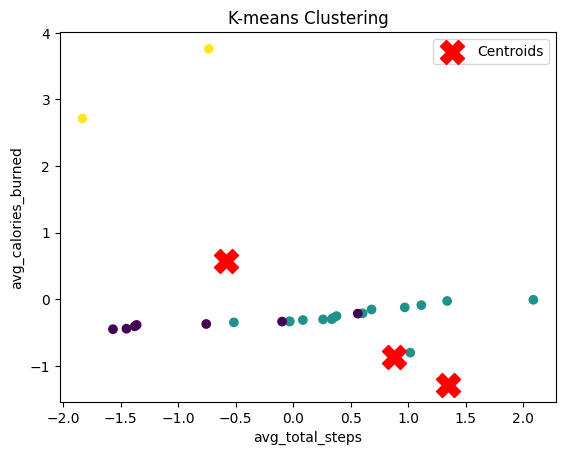

In [95]:
# Example: 2D scatter plot for the first two features
plt.scatter(data_scaled['avg_total_steps'], data_scaled['avg_calories_burned'], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='X', c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('avg_total_steps')
plt.ylabel('avg_calories_burned')
plt.legend()
plt.show()


In [101]:
# Calculate distances from each point to its cluster centroid
distances = np.min(kmeans.transform(data_scaled), axis=1)

# Set a threshold to identify outliers
threshold = 1  # Adjust as needed
outliers = data[distances > threshold]


In [107]:
outliers

,Id,avg_total_steps,avg_very_active_minutes,avg_moderate_minutes,avg_light_minutes,avg_sedentary_minutes,avg_calories_burned,avg_sleep_time,avg_time_in_bed
0,1503960366,14763,38,19,219,848,3436,360,383
1,1644430081,12116,9,21,178,1161,3359,294,346
2,1844505072,11323,0,1,115,1206,3093,652,961
3,1927972279,10984,1,0,38,1317,29,417,437
4,2026352035,10813,0,0,256,689,2945,506,537
5,2320127002,9794,1,2,198,1220,2811,61,69
6,2347167796,9519,13,20,252,687,2566,446,491
7,3977333714,9371,18,61,174,707,2544,293,461
8,4020332650,8717,5,5,76,1237,2385,349,379
9,4319703577,8612,3,12,228,735,2261,476,501


In [112]:
#remove outliers with winszors

# Winsorizing example
q_low = outliers['avg_total_steps'].quantile(0.01)
q_high = outliers['avg_calories_burned'].quantile(0.99)
outliers['avg_total_steps'] = np.where(outliers['avg_total_steps'] < q_low, q_low, outliers['avg_total_steps'])
outliers['avg_calories_burned'] = np.where(outliers['avg_calories_burned'] > q_high, q_high, outliers['avg_calories_burned'])


In [113]:
outliers

,Id,avg_total_steps,avg_very_active_minutes,avg_moderate_minutes,avg_light_minutes,avg_sedentary_minutes,avg_calories_burned,avg_sleep_time,avg_time_in_bed
0,1503960366,14763.00,38,19,219,848,3436.00,360,383
1,1644430081,12116.00,9,21,178,1161,3359.00,294,346
2,1844505072,11323.00,0,1,115,1206,3093.00,652,961
3,1927972279,10984.00,1,0,38,1317,29.00,417,437
4,2026352035,10813.00,0,0,256,689,2945.00,506,537
5,2320127002,9794.00,1,2,198,1220,2811.00,61,69
6,2347167796,9519.00,13,20,252,687,2566.00,446,491
7,3977333714,9371.00,18,61,174,707,2544.00,293,461
8,4020332650,8717.00,5,5,76,1237,2385.00,349,379
9,4319703577,8612.00,3,12,228,735,2261.00,476,501
